<a href="https://colab.research.google.com/github/avichaynega/Final-Project/blob/master/knn_anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Data preparation
we are using the cat consuming habits dataset from the Github repo.

In [127]:
# import data
data = pd.read_csv("https://raw.githubusercontent.com/avichaynega/Final-Project/master/dataset/ds.csv")
data.head()


,catid,foodweight,time,eatingfrequency,consavg,deltaw,date,index
0,1,105.22,00:00,1,-,5.39,1.9.21,1
1,1,101.95,01:30,2,-,5.34,1.9.21,2
2,1,103.68,03:00,3,-,5.67,1.9.21,3
3,1,102.91,06:00,4,-,4.56,1.9.21,4
4,1,103.99,05:30,5,NaN,5.03,1.9.21,5


# Anomaly Detection Using KNN (K Nearest Neighbors)

In [128]:
# input data
df = data[["deltaw","index"]]

X = df.values

nbrs = NearestNeighbors(n_neighbors =10)

# fit model
nbrs.fit(X)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

anomaly detection


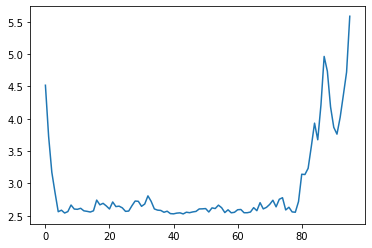

In [129]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))


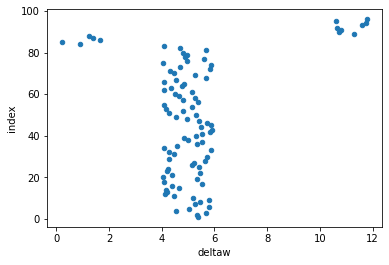

In [130]:
df.plot.scatter(x='deltaw', y='index')

In [131]:
# visually determine cutoff values > 0.15
outlier_index = np.where(distances.mean(axis = 1) >3.3)

# filter outlier values
outlier_values = df.iloc[outlier_index]

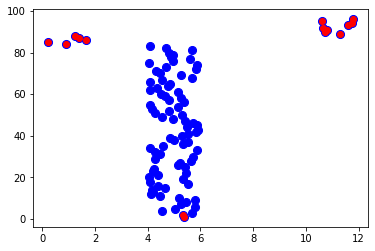

In [132]:
# plot data
plt.scatter(df["deltaw"], df["index"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["deltaw"], outlier_values["index"], color = "r")

# **Anomaly Detection using IsolationForest**

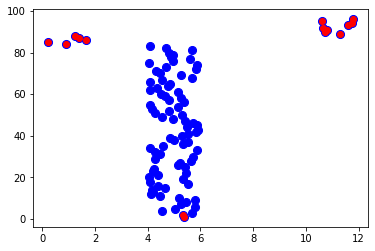

In [133]:
from sklearn.ensemble import IsolationForest

model=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.1),max_features=1.0)
x= df.values
model.fit(x)

df2 = df[['deltaw', 'index']]
df2['anomaly']=model.predict(x)
outlier_index_for = np.where(df2['anomaly'] == -1)

outlier_values_for = df2.iloc[outlier_index]


plt.scatter(df2["deltaw"], df2["index"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values_for["deltaw"], outlier_values_for["index"], color = "r")
